\title{\LARGE III Assignment Data Analytics: Advanced Data Analytics in Action}

The first step is importing the libraries which will be used in this assignment 
such as pandas numpy or seaborn.

In [1]:
#import the libraries which will be used
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from flask import Flask, request, jsonify
import traceback
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, auc,roc_curve, roc_auc_score, f1_score
from urllib.request import urlopen
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV,ParameterGrid, RepeatedKFold
import plotly.express as px
import multiprocessing
import joblib

\subsection{Download the dataset and Inspect the dataset}

How i have the libraries now i need the dataset which will be study. I will upload it and 
show a few of its rows.

In [6]:
#dowload the dataset
dir = 'online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv'
rev = pd.read_csv(dir, sep = ',')
pd.options.display.max_columns = None #show all the columns
print(rev.head())#show the dataset first rows

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

These are the different varriables:
\begin{itemize}
\item Administrative: Number of pages visited under the "administrative" category.
\item Administrative\_Duration: Total time spent on administrative pages.
\item Informational: Number of pages visited under the "informational" category.
\item Informational\_Duration: Total time spent on informational pages.
\item ProductRelated: Number of pages visited under the "product-related" category.
\item ProductRelated\_Duration: Total time spent on product-related pages.
\item BounceRates: Percentage of visitors who leave the site after viewing only one page.
\item ExitRates: Percentage of visitors who leave the site after viewing multiple pages.
\item PageValues: Average value per page view.
\item SpecialDay: A numerical value representing how close the visit is to a special day (e.g., holidays).
\item Month: The month in which the visit occurred.
\item OperatingSystems: The operating system used by the visitor.
\item Browser: The browser used by the visitor.
\item Region: The geographic region of the visitor.
\item TrafficType: The source of the visitor’s traffic (e.g., search engine, direct access).
\item VisitorType: Whether the visitor is a new or returning visitor.
\item Weekend: Whether the visit occurred on a weekend (binary: 1 for yes, 0 for no).
\item Revenue: Whether the visitor made a purchase (binary: 1 for purchase, 0 for no purchase).
\end{itemize}

In this exercise i will predict if a client make purchase (Revenue) depending of the rest of variables.

\section{Data Preprocessing}

\subsection{Handle missing values}

Following i will the see the type of the columns and if there are missing values.

In [7]:
rev.info()#show the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

It is not possible to see missing values but if we study
the values of the categorical columns the variable VisitorType has
three categories so other is a missing value.

In [8]:
# show the number of elements from each non ordinal variable which can be cualitative
non_ord = ['OperatingSystems', 'Browser', 'Region',
           'TrafficType', 'VisitorType', 'Weekend']# columns of type distinct to ordinal
low_num = []
high_num = []
for col in non_ord:
    print(col, rev[col].unique())# print the variable and its elements
# put variables with 10 or more distict elements in a vector and the rest on other
    if len(rev[col].unique()) <10:
        low_num.append(col)
    else:
        high_num.append(col)
print(low_num)
print(high_num)

OperatingSystems [1 2 4 3 7 6 8 5]
Browser [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region [1 9 2 3 4 5 6 7 8]
TrafficType [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
VisitorType ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend [False  True]
['OperatingSystems', 'Region', 'VisitorType', 'Weekend']
['Browser', 'TrafficType']


It is neccesary to change Other for NaN in the column VisitorType using the 
function "replace".

In [9]:
# change Other in VisitorType to NaN
rev = rev.replace("Other", np.nan)
rev

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [10]:
rev.isnull().sum() # show the number of NaN of each column

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                85
Weekend                     0
Revenue                     0
dtype: int64

Now there are missing values only in  VisitorType.

To fill the new missing values i will sustitute them by the mode of VisitorType.

In [11]:
# fill NaN using the mode
moda = rev['VisitorType'].mode()[0]#create the mode 

rev['VisitorType'].fillna(moda, inplace = True) # fill the Na with the mode of the variable

In [12]:
rev.isnull().sum() # show the number of NaN of each column

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

\subsection{Encode categorical variables}

The next step is data and create new variables so i will make a copy of the dataset.

In [13]:
rev_fin = rev.copy() # copy the dataset
rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


To begin i will use a label encoding to convert the categorical columns with an order or
few diffrent categories in numerical.

In [14]:
# use a label encoding for the categorical columns with an order
ordinal = ['Month']# columns of type ordinal

label_encoder = LabelEncoder()# create the label encoder

rev_fin['Month'] = label_encoder.fit_transform(rev_fin['Month']) #transform the columns
rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,Returning_Visitor,False,False


In [15]:
# use a label encoding for the categorical columns with few distinct elements

label_encoder = LabelEncoder()# create the label encoder

for k in low_num:

    rev_fin[k] = label_encoder.fit_transform(rev_fin[k]) #transform the columns
    
rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,0,1,0,1,1,0,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,1,2,0,2,1,0,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,3,1,8,3,1,0,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,2,2,1,4,1,0,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,2,3,0,4,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,3,6,0,1,1,1,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,2,2,0,8,1,1,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,2,2,0,13,1,1,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,1,2,2,11,1,0,False


The rest of categorical features will be transform into numerical using a one-hot encoding
by which each distinct category of a variable will be represented in a new column.

In [16]:
# convert the rest of categorical features using one-hot encodering  
for k in high_num: # run the vector of categorical variable names
#inicialize the encoderer
    encoder = OneHotEncoder(sparse = False)

# Fit and transform the categorical columns
    encoded = encoder.fit_transform(rev_fin[[k]]) # convert the categorical features
    if hasattr(encoder, 'get_feature_names_out'):# see if the encoderer has the atribute get_feature_names_out
        feature_names = encoder.get_feature_names_out([k]) # add the name of the feature in a list
    else:
        feature_names = [f'{k}_{cat}' for cat in encoder.categories_[0]] # create and add the name of the feature
    encoderdata = pd.DataFrame(encoded, columns=feature_names)# add to the new features to the dataset
 
    rev_fin = rev_fin.join(encoderdata) # put the new features to the dataset rev_fin
rev_fin = rev_fin.drop(non_ord, axis=1) # delete old features
rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Revenue,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


\subsection{Feature creation}

Now i will create two new variable using the 
(number of pages visited under the category)/(total time spent on pages of type) 
"administrative", "informational" and "product-related".

In [17]:
rev_fin['Number pages'] = rev_fin['Administrative'] + rev_fin['Informational'] + rev_fin['ProductRelated']
rev_fin['Total time'] = rev_fin['Administrative_Duration'] + rev_fin['Informational_Duration'] + rev_fin['ProductRelated_Duration']
rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Revenue,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Number pages,Total time
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,627.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,1928.791667
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,465.750000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,184.250000
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,421.000000


\subsection{Normalization}

To end this section i will normalize the numerical variables of the original dataset 
using a MixMaxScaler.

In [18]:
# standarization of the numerical variables using a min max scaler

for k in rev.columns.to_list()[0:10]: # find and run the vector of numerical variable names 
    scaler = MinMaxScaler() 
    rev_fin[k] = scaler.fit_transform(rev_fin[[k]]) # standarize the numeral features and add to the dataset

rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Revenue,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Number pages,Total time
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,64.000000
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.666667
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,2,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,627.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,1,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,1928.791667
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,465.750000
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,184.250000
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,421.000000


\section{Exploratory Data Analysis }

In this section i will to explore the dataset.

In [19]:
numerical = rev.columns.to_list()[0:10]
categorical = rev.columns.to_list()[10:17]

\subsection{Visualize numerical variables}

First of all i will use histograms, box plots, and pair plots 
to examine the distribution of numerical variables.

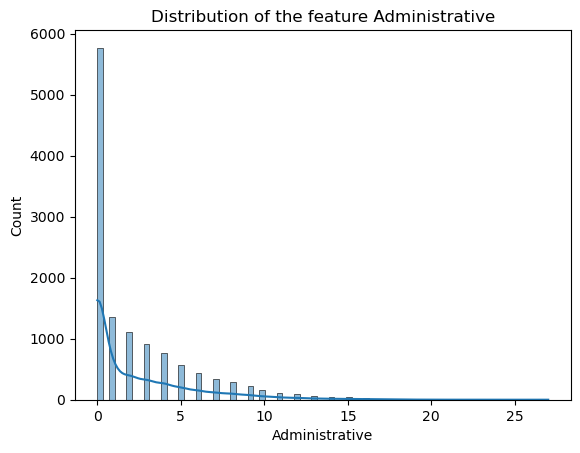

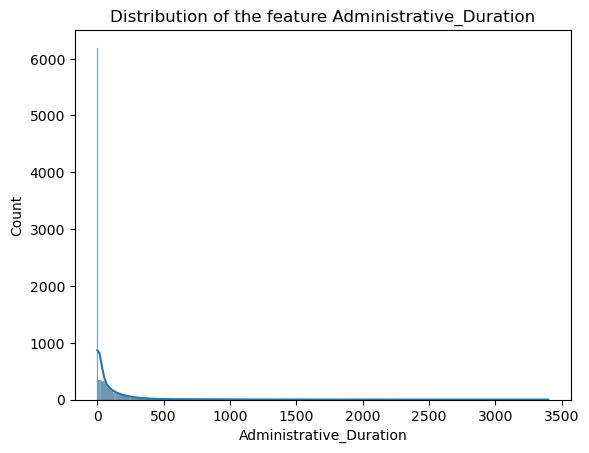

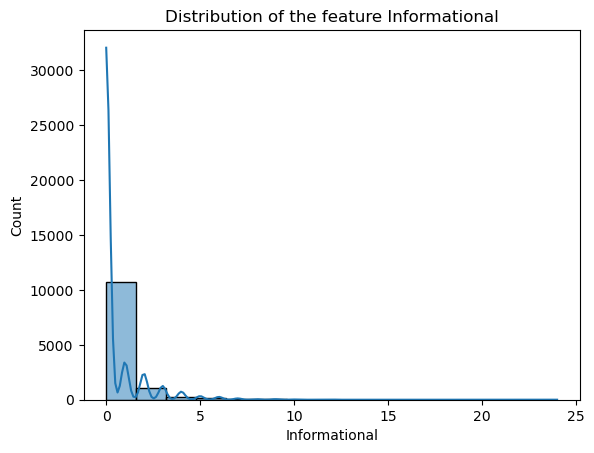

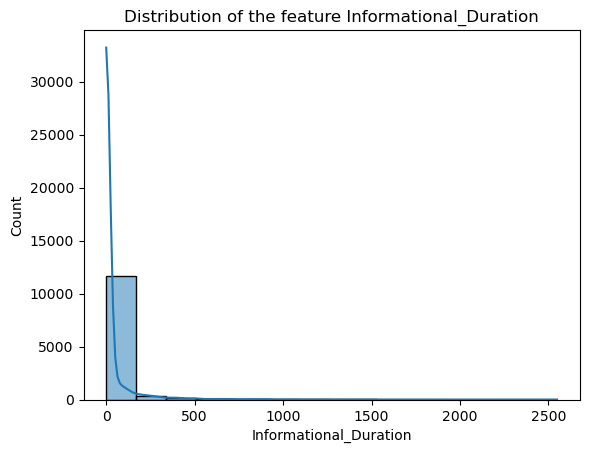

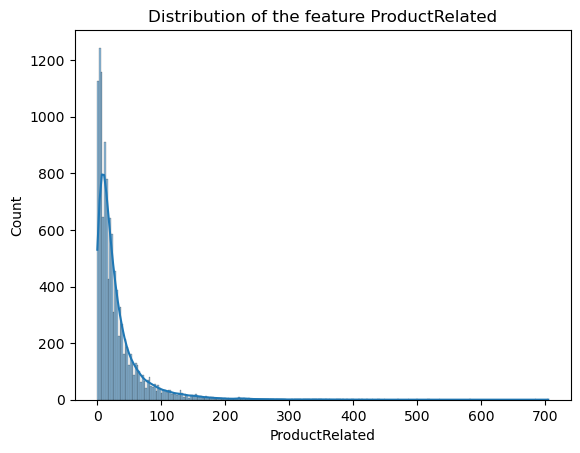

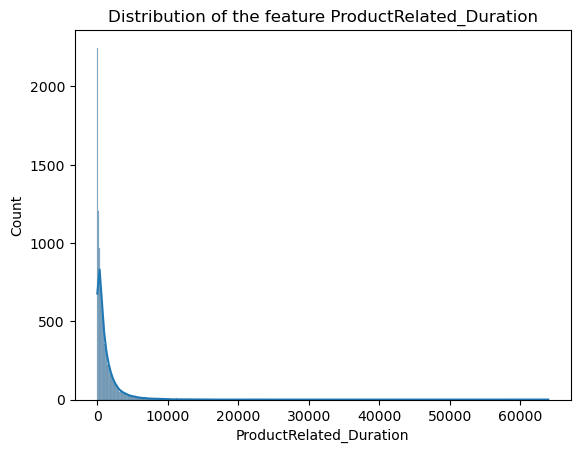

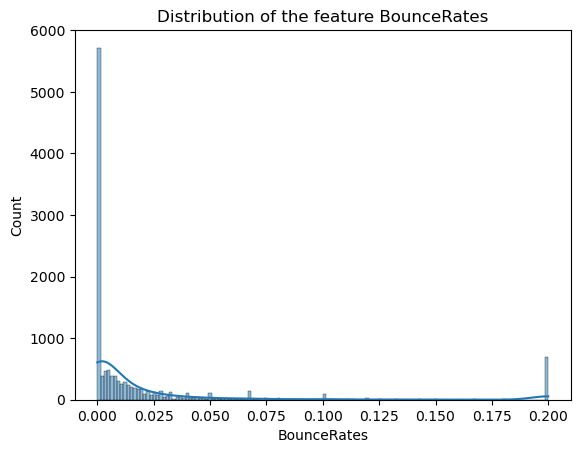

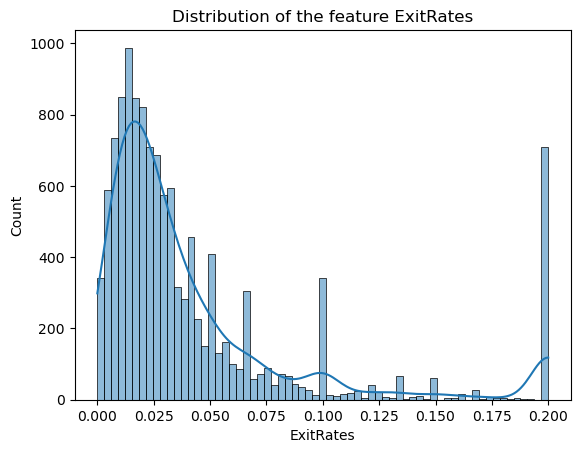

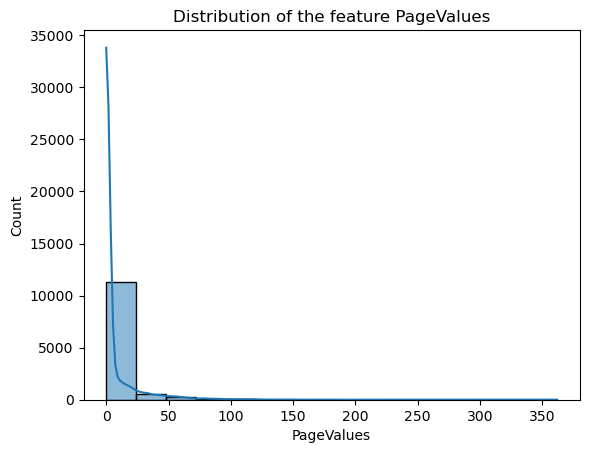

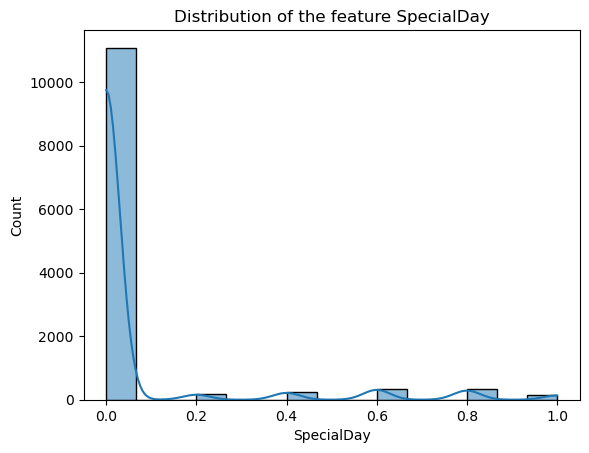

In [20]:
#plot the histogram of the numerical variables to study their distribution
for k in numerical:
    sns.histplot(rev[k], kde=True) # create the histogram
    plt.title('Distribution of the feature ' + k) # change the title
    plt.show() # plot the histogram

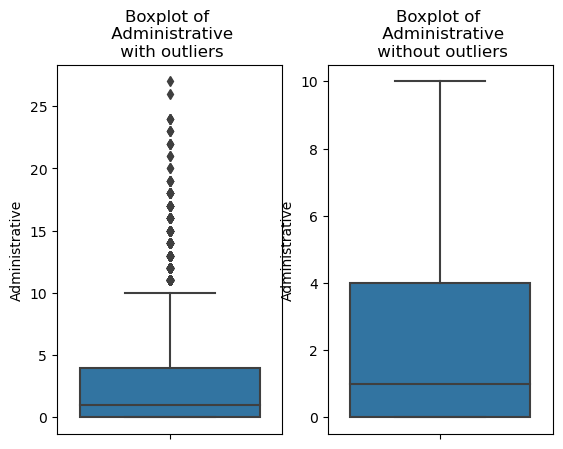

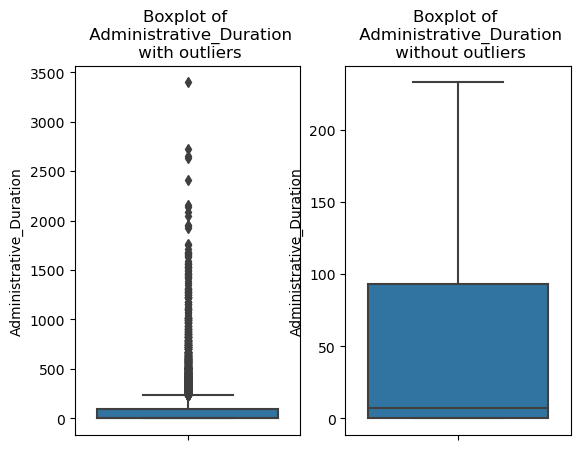

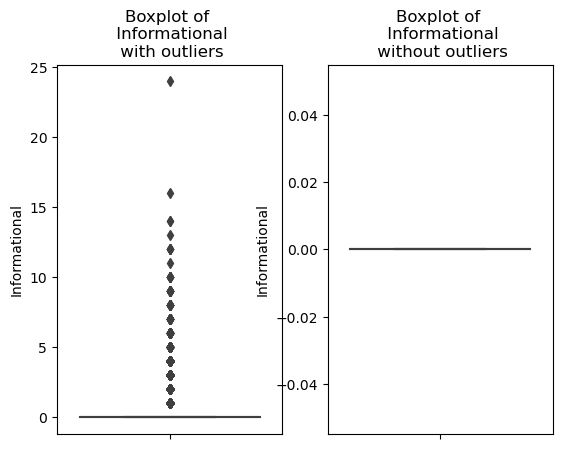

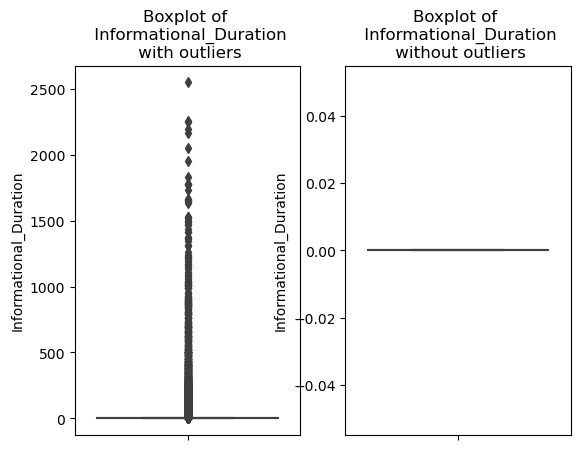

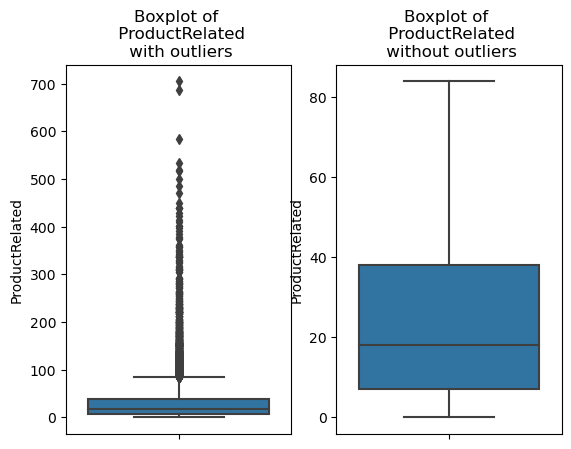

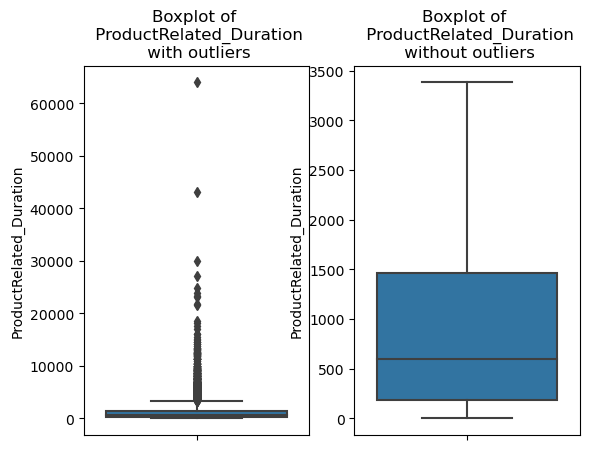

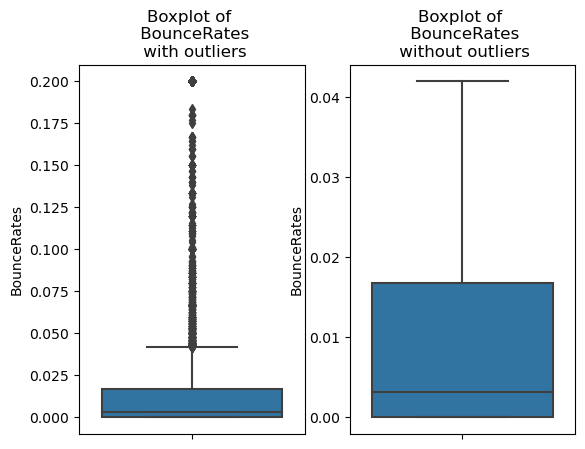

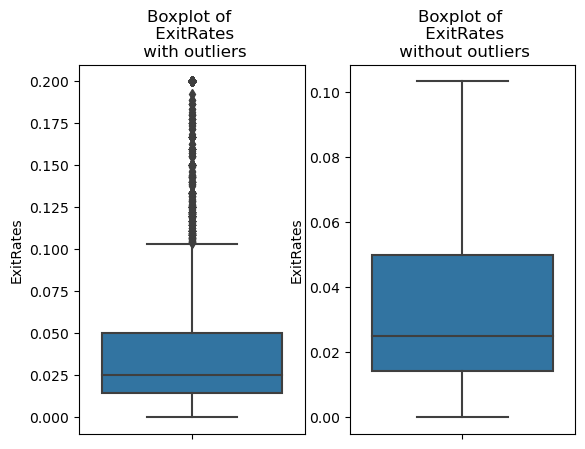

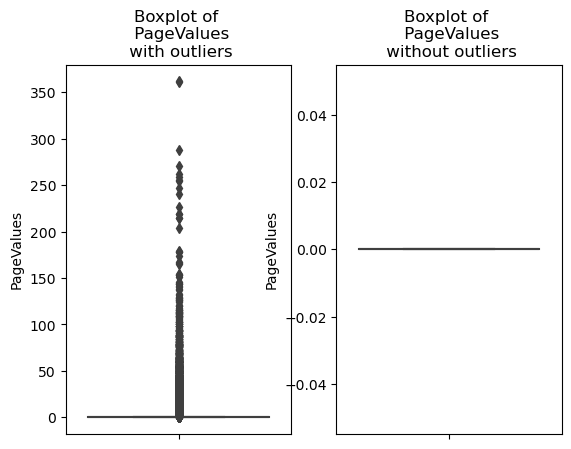

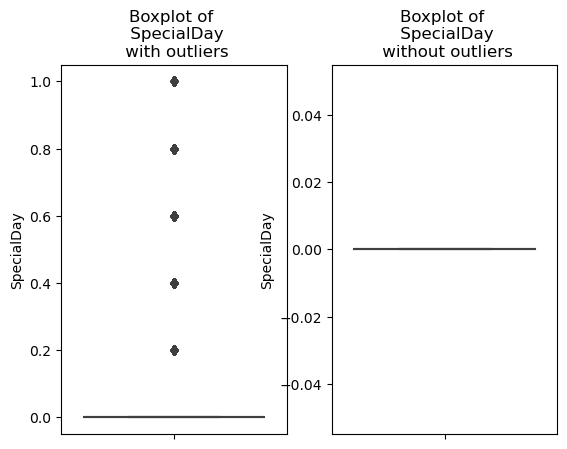

In [21]:
#plot the boxplot of the numerical variables to study their distribution
for k in numerical:
    plt.subplot(1, 2, 1)
    sns.boxplot(y=rev[k], orient = 'v' ) # create the boxplot
    plt.title('Boxplot of \n ' + k + '\n with outliers') # change the title
    plt.subplot(1, 2, 2)
    sns.boxplot(y=rev[k], showfliers=False, orient = 'v') # create the boxplot
    plt.title('Boxplot of \n ' + k + '\n without outliers') # change the title
    plt.show() # plot the histogram

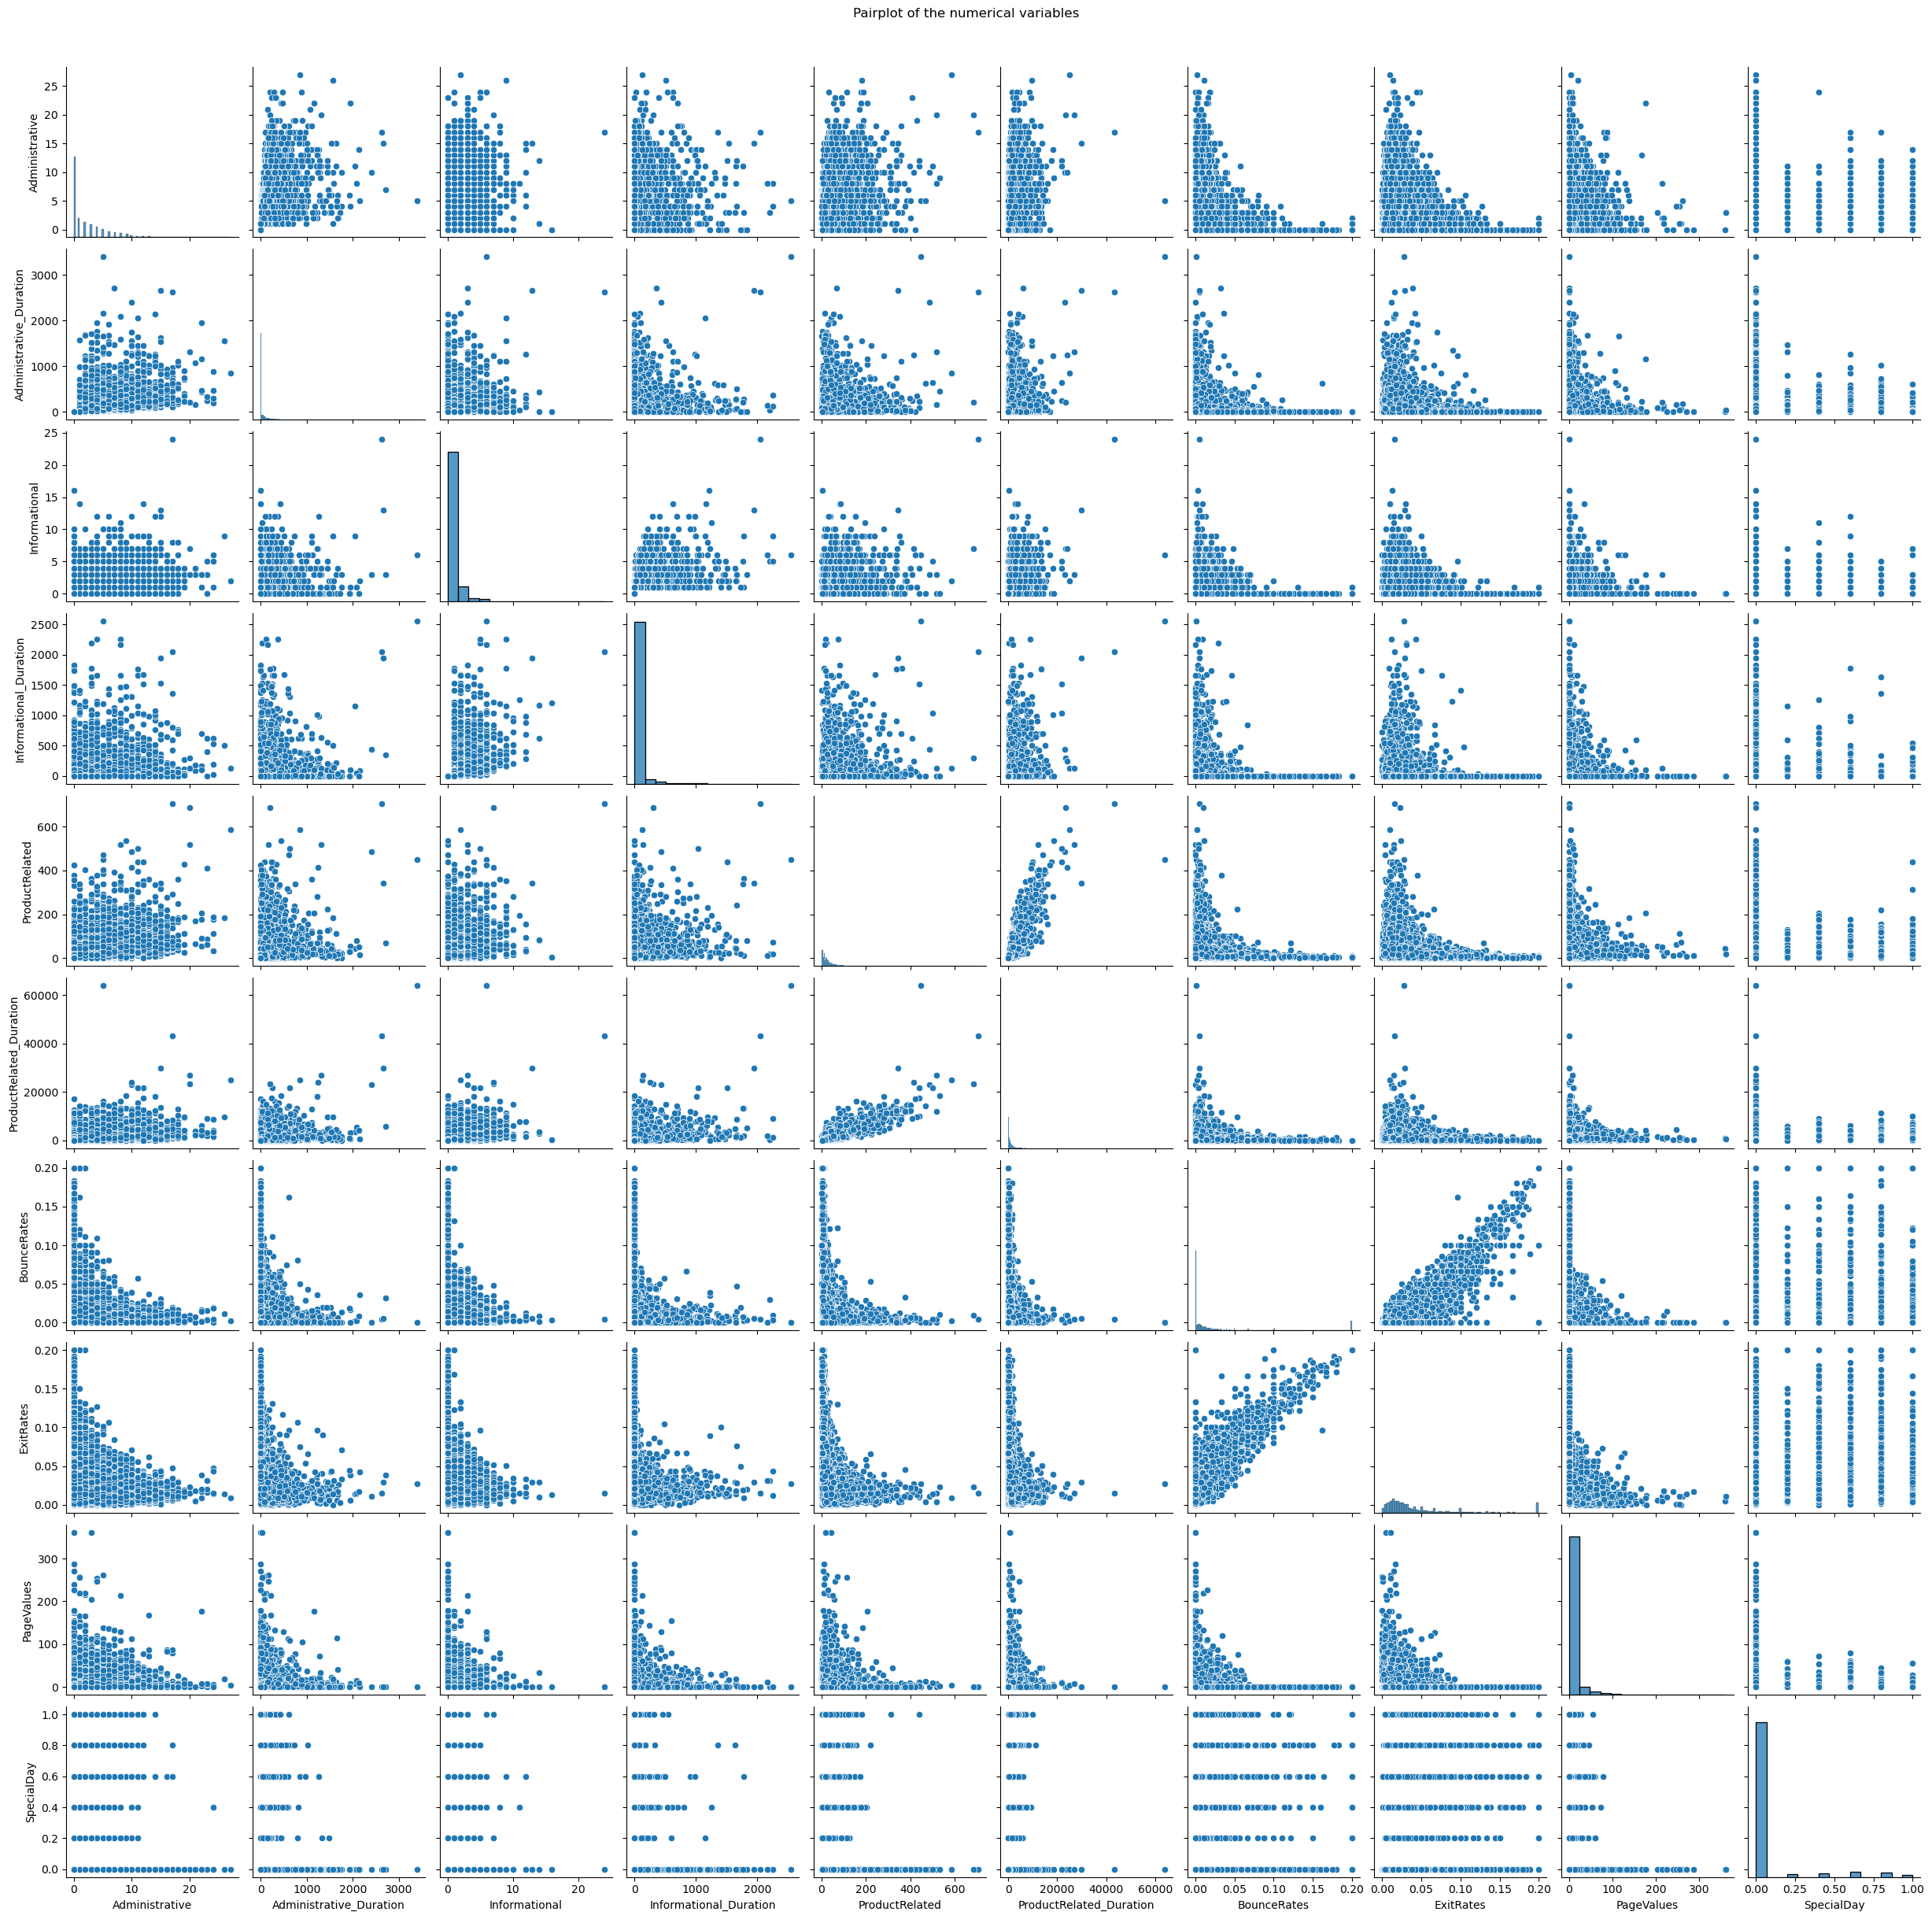

In [22]:
pair = sns.pairplot(rev[numerical])
pair. fig . subplots_adjust (top= .95 )
pair.fig.suptitle('Pairplot of the numerical variables')
plt.show()

No-one of the numerical variables have a gaussian distribution.

\subsection{Analyze categorical variables}

Next categorical variables will be represented by using plot bar charts and pie charts.

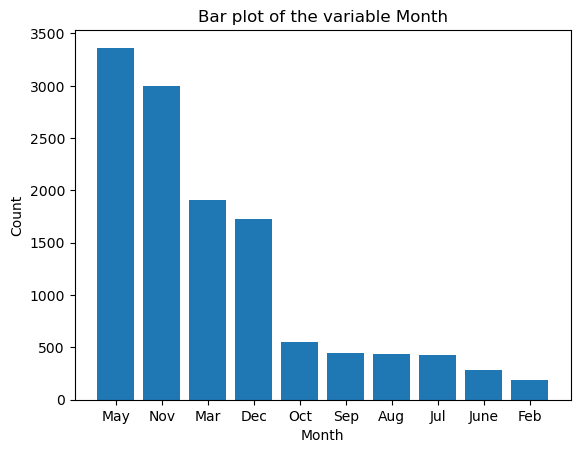

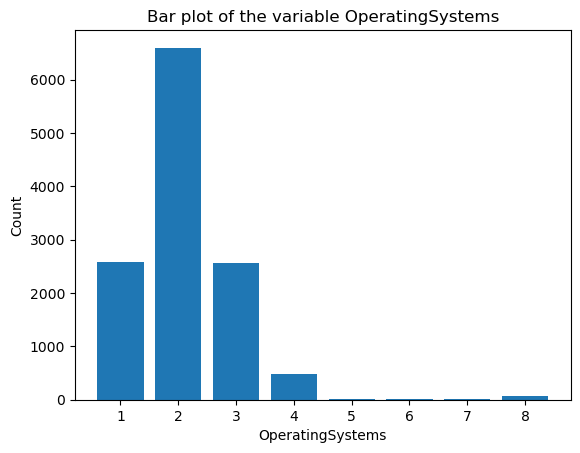

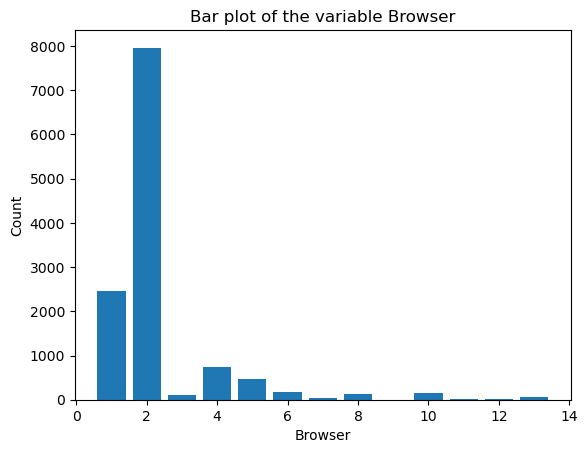

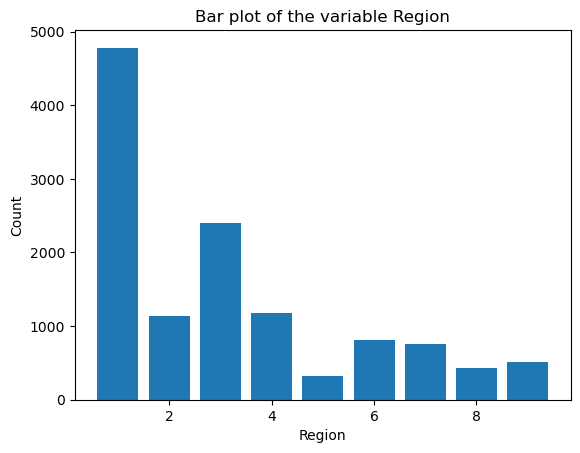

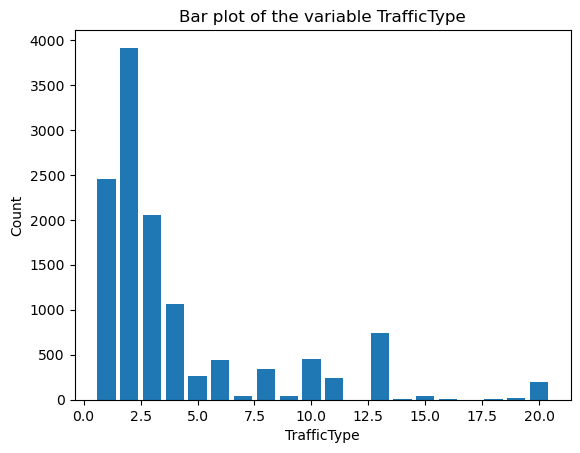

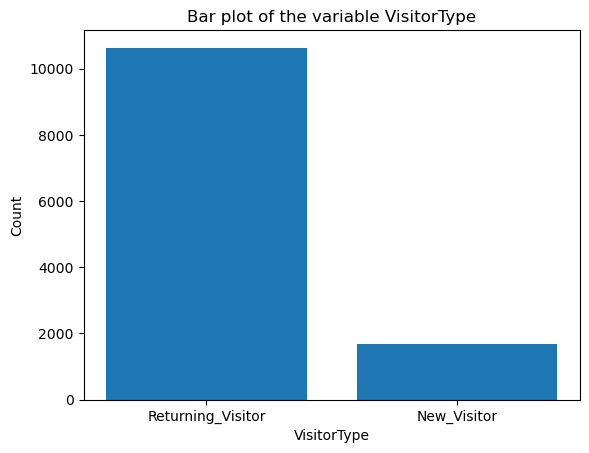

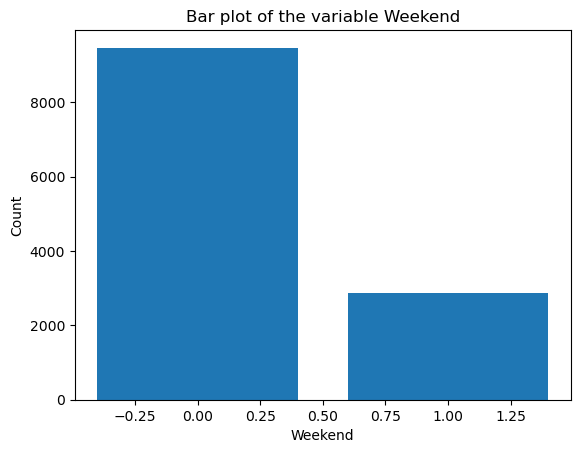

In [23]:
#now use the barplot to show the distribution of categorical variables

for k in categorical:
    cut_counts = rev[k].value_counts()# count the repetitions of each class
    fig = plt.bar(x = cut_counts.index, height=cut_counts.values)
    plt.title( 'Bar plot of the variable ' + k )
    plt.xlabel(k)
    plt.ylabel('Count')
    plt.show()   

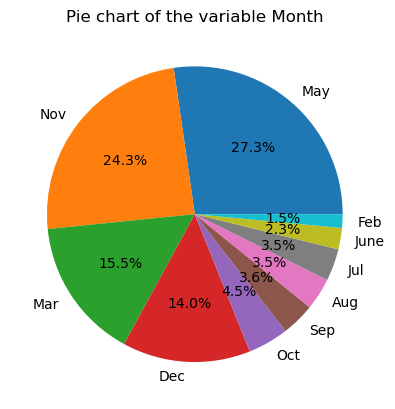

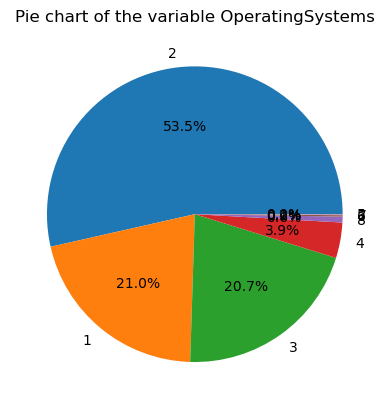

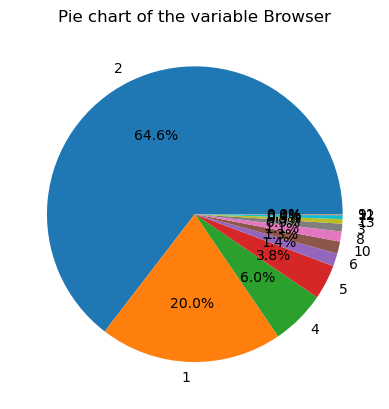

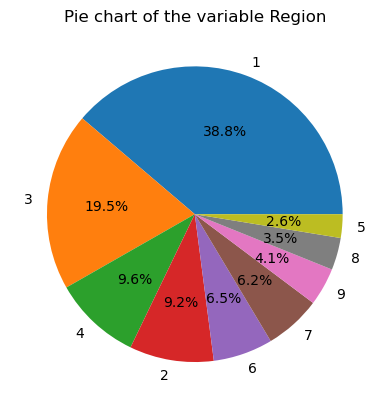

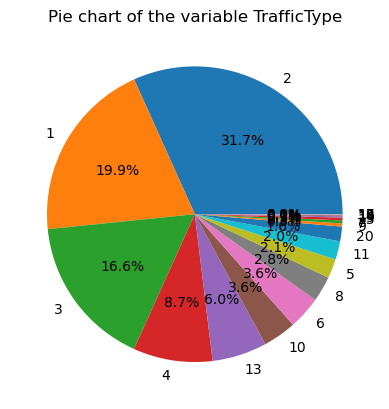

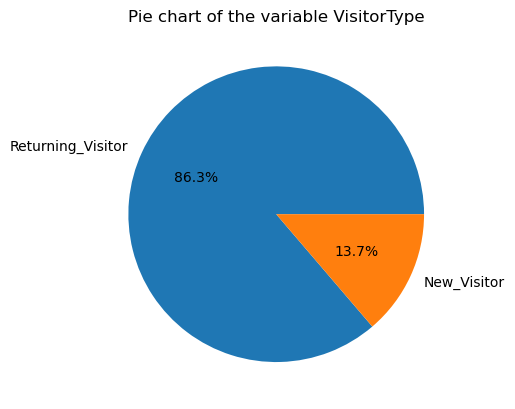

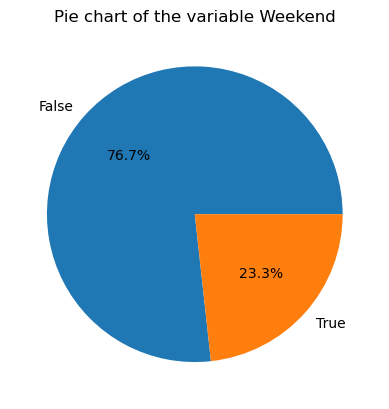

In [24]:
#now use the pie charts to show the distribution of categorical variables

for k in categorical:
    cut_counts = rev[k].value_counts()# count the repetitions of each class

    plt.pie( cut_counts.values, labels = cut_counts.index, autopct='%1.1f%%')# plot the pie charts to indicate the number of repetitiones of each class
    plt.title( 'Pie chart of the variable ' + k )
    plt.show()


\subsection{Correlation analysis}

Finally, i will study the correlation between the numerical variables using a 
a heatmap of the correlation matrix.

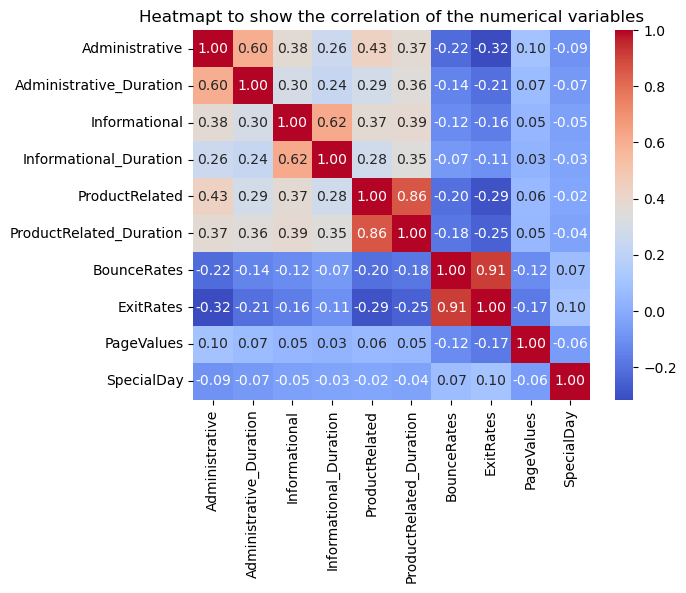

In [25]:
# I am going to see the correlation matrix between the variables

corrmat_new = rev[numerical].corr()# create the correlation matrix
#print the headmap of the group which have been made 

ax = plt.axes()
heat = sns.heatmap(corrmat_new, annot=True, cmap='coolwarm', fmt='.2f', ax = ax)
ax.set_title('Heatmapt to show the correlation of the numerical variables')
plt.show()

Due to the heatmap we can say that:
\begin{enumerate}
\item The time spent on administrative/informational pages and the number of pages visited of type 
administrative/informational have a correlation near to 0,6.
\item The time spent on product related pages and the number of pages visited of type 
product related have a correlation of 0,86.
\item The correlation between BounceRates and ExitRates is of 0,91.
\item The rest of correlation is not up to 0,5.
\end{enumerate}

\section{Feature Engineering}

\subsection{Create new features}

Now i will create a new variable in which the variable VisitorType will be transform into binary.

In [26]:
# create a new variable VisitorType_New which convert VisitorType in a binary variable
rev_fin["VisitorType_New"] = rev["VisitorType"].replace({'Returning_Visitor': 1, 'New_Visitor': 0}, regex=True)
rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Revenue,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Number pages,Total time,VisitorType_New
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,1
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,64.000000,1
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,2,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,1
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,2,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.666667,1
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,2,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,627.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,1,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,1928.791667,1
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,465.750000,1
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,184.250000,1
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,7,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,421.000000,1


\subsection{Tarjet variable creation}

Also i will transform Revenue in a categorical variable.

In [27]:
# convert Revenue in a binary variable
label_encoder = LabelEncoder()# create the label encoder

rev_fin["Revenue"] = label_encoder.fit_transform(rev_fin["Revenue"]) #transform Revenue

rev_fin

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Revenue,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Number pages,Total time,VisitorType_New
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,1
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,64.000000,1
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,1
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.666667,1
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,627.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,1928.791667,1
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,465.750000,1
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,184.250000,1
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,7,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,421.000000,1


\section{Train-Test Split}

In this section i will split the data into training and testing sets.

In [28]:
# I am going to split the dataset into training and testing sets
# first i separate the predictive variable Y and the predictors variables X
y= rev_fin['Revenue']
x = rev_fin.drop(['Revenue'], axis=1)
#create the training and testing sets using to create de testing set the 20% of data
# use the parameter stratify = y to get stratified samples
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, stratify = y, random_state=23)

Finally i have to see if both groups have a balance of both categories of Revenue

In [25]:
count_train = y_train.value_counts()
count_test = y_test.value_counts()
#calculate the percentage of purchase or non purchase in the test and train sets
print(count_train/sum(count_train.values))
print(count_test/sum(count_test.values))


0    0.845296
1    0.154704
Name: Revenue, dtype: float64
0    0.845093
1    0.154907
Name: Revenue, dtype: float64


Both groups are balanced so are good.

Stratified samples will not be used because there are many variables so it will mean many strates 
with few elements.

\section{Model Development}

In this section i will develop a example of the following models:
\begin{itemize}
    \item Logistic Regression
    \item Random Forest
    \item Gradient Boosting    
\end{itemize}
Secondly in each model i will use a Grid Search CV of the models to find the best hiperparameters of
the corresponding model.

\subsection{Logistic Regression}

In [ ]:
#set that I will use a logistic regression model to do the regression
mod_log = LogisticRegression(max_iter=100000)
#train the model
mod_log.fit(x_train,y_train)

In the Logistic Regression i will find the hiperparameters penalty, C, solver and maximun of iterations.

In [ ]:
# Grid of evaluated hiperparmeters
# ==============================================================================
param_grid_lr = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,9),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [50, 100, 500, 1000]
}
]

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_lr = GridSearchCV(
        estimator  = LogisticRegression(random_state=123),
        param_grid = param_grid_lr,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = True,
        return_train_score = True
       )

grid_lr.fit(X = x_train, y = y_train)

# Resultados
# ==============================================================================
result_lr = pd.DataFrame(grid_lr.cv_results_)
result_lr.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Here the best hiperparameters of the Logistic Regression model can be seen.

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_lr.best_params_, ":", grid_lr.best_score_, grid_lr.scoring)

I make the model with the best hiperparameters and save it using a joblib.

In [ ]:
mod_lr_fin = grid_lr.best_estimator_
mod_lr_fin

In [26]:
joblib.dump(mod_lr_fin, 'my_model_lr.pkl.pkl')

NameError: name 'mod_lr_fin' is not defined

In [2]:
lr_load = joblib.load('my_model_lr.pkl.pkl')
lr_load

LogisticRegression(C=10.0, max_iter=50, penalty='l1', random_state=123,
                   solver='liblinear')

\subsection{Random Forest}

In [ ]:
#see that I will use a Random Forest model 
mod_rf = RandomForestClassifier()
#train the model
mod_rf.fit(x_train,y_train)

In the Random Forest i will find the hiperparameters bootstrap, maximun depth,
maximun features, minimun of samples of each leaf, 
minimun of samples of each split and number of estimators.

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 500, 1000]
}
#

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_rf = GridSearchCV(
        estimator  = RandomForestClassifier(random_state=123),
        param_grid = param_grid_rf,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_rf.fit(X = x_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_rf.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

As in the Logistic model i will show the hiperparameters, create the best model and save it.

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_rf.best_params_, ":", grid_rf.best_score_, grid_rf.scoring)

In [ ]:
mod_rf_fin = grid_rf.best_estimator_
mod_rf_fin

In [ ]:
joblib.dump(mod_rf_fin, 'my_model_rf.pkl.pkl')

In [3]:
rf_load = joblib.load('my_model_rf.pkl.pkl')
rf_load

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000,
                       random_state=123)

\subsection{Gradient Boosting}

In [ ]:
#make a LigthGBM 
mod_ran = HistGradientBoostingClassifier()
#train the model
mod_ran.fit(x_train,y_train)

The hiperparameters which will be studied in the Gradient Boosting model are
maximun number of iterations, maximun depth and learning rate.

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid_gbc = {
    'max_iter'      : [50, 100, 500, 1000],
    'max_depth'     : [3, 5, 10, 20],
    'learning_rate' : [0.001, 0.01, 0.1]
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_gbc = GridSearchCV(
        estimator  = HistGradientBoostingClassifier(random_state=123),
        param_grid = param_grid_gbc,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_gbc.fit(X = x_train, y = y_train)

# Resultados
# ==============================================================================
result_gbc = pd.DataFrame(grid_gbc.cv_results_)
result_gbc.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Once i have made the GridSearchCV, i print the best hiperparameters, make the best model and save it.

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid_gbc.best_params_, ":", grid_gbc.best_score_, grid_gbc.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
<bound method BaseEstimator.get_params of HistGradientBoostingClassifier(learning_rate=0.01, max_depth=3, max_iter=1000,
                               random_state=123)> : grid_gbc.best_score_, grid_gbc.scoring


In [ ]:
mod_ran_fin = grid_gbc.best_estimator_
mod_ran_fin

In [ ]:
joblib.dump(mod_ran_fin, 'my_model_ran.pkl.pkl')

In [2]:
ran_load = joblib.load('my_model_ran.pkl.pkl')
ran_load

HistGradientBoostingClassifier(learning_rate=0.01, max_depth=3, max_iter=1000,
                               random_state=123)

\section{Model Evaluation}

Now i have the models which will be compare. To do it i will predict the values of Revenue using 
test set of predictive data.

In [30]:
#now i am going to make predictions using the models
y_pred_lr = lr_load.predict(x_test)

y_pred_rf = rf_load.predict(x_test)

y_pred_gbc = ran_load.predict(x_test)

To compare the different models i will use the predicted data and Revenue data of the test set.
The metrics which will be used in the comparison are:
\begin{itemize}
\item Train Accuracy
\item Test Accuracy
\item Preccision
\item Recall
\item AUC
\item F1-score
\end{itemize}

In [31]:
clf =  [lr_load, rf_load, ran_load]

ind = ['Logistic Regression', 'Random Forest', 'LightGBM']
clf_columns = [] 
clf_compare = pd.DataFrame(columns = clf_columns) 
row_index = 0 

for alg in clf: 
    predicted = alg.predict(x_test) 
    fp, tp, th = roc_curve(y_test, predicted) 
    clf_name = alg.__class__.__name__ 
    clf_compare.loc[ind[row_index], 'Train Accuracy'] = round(alg.score(x_train, y_train), 5) 
    clf_compare.loc[ind[row_index], 'Test Accuracy'] = round(alg.score(x_test, y_test), 5) 
    clf_compare.loc[ind[row_index], 'Precission'] = round(precision_score(y_test, predicted),5) 
    clf_compare.loc[ind[row_index], 'Recall'] = round(recall_score(y_test, predicted),5) 
    clf_compare.loc[ind[row_index], 'AUC'] = round(roc_auc_score(y_test, alg.predict_proba(x_test)[:,1]),5)
    clf_compare.loc[ind[row_index], 'F1-Score'] = round(f1_score(y_test, predicted),5) 
    row_index+=1 
    
 
clf_compare 

,Train Accuracy,Test Accuracy,Precission,Recall,AUC,F1-Score
Logistic Regression,0.88696,0.88118,0.73057,0.36911,0.88667,0.49043
Random Forest,0.92954,0.88848,0.87413,0.32723,0.92783,0.47619
LightGBM,0.91809,0.90268,0.71386,0.62042,0.93544,0.66387


Also to compare the models i will print the classification reports and confussion matrics of the models.

In [32]:
# i will print the classification report of the models
index = 0
for alg in clf: 
    predicted = alg.predict(x_test) 
    print(ind[index] + ' Classification Report\n', classification_report(y_test, predicted, zero_division = 0.0))
    index += 1

Logistic Regression Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.73      0.37      0.49       382

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466

Random Forest Classification Report
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2084
           1       0.87      0.33      0.48       382

    accuracy                           0.89      2466
   macro avg       0.88      0.66      0.71      2466
weighted avg       0.89      0.89      0.87      2466

LightGBM Classification Report
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.71      0.62      0.66       382

    accuracy                           0.90      2466
   macro avg    

In [ ]:
# i will print the confusion matrix of the models
index = 0
for alg in clf: 
    predicted = alg.predict(x_test) 
    print(ind[index] + ' Classification Matrix\n',  confusion_matrix(y_test, predicted))
    index += 1

Logistic Regression Classification Matrix
 [[2032   52]
 [ 241  141]]
Random Forest Classification Matrix
 [[2066   18]
 [ 257  125]]
LightGBM Classification Matrix
 [[1989   95]
 [ 145  237]]


I have seen that there are data in different category of the dataset which appear more than others 
so i will use the F1-Score to choose the best model. By this reason the best model is the Gradient Boosting model.

In [30]:
best_mod = ran_load
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')


['model_columns.pkl']

\section{Insights and Variable Importance}

In this final section i will use the permutation importances to see which variables are more important to predict 
if someone will do a purchase. The importances of the features will be shown in a table and in a graphic.

In [ ]:
# now study the permutation importance to predict Sales
importancia = permutation_importance(best_mod, x_train, y_train)
# store mean y desviation in a dataframe
sales_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
sales_importancia['feature'] =  x_train.columns.values
sales_importancia

,importances_mean,importances_std,feature
0,0.004339,0.000392,Administrative
1,0.004663,0.000811,Administrative_Duration
2,0.000000,0.000000,Informational
3,0.000223,0.000118,Informational_Duration
4,0.003183,0.000291,ProductRelated
5,0.002230,0.000638,ProductRelated_Duration
6,0.002413,0.000830,BounceRates
7,0.013788,0.001044,ExitRates
8,0.148702,0.002241,PageValues
9,0.000000,0.000000,SpecialDay


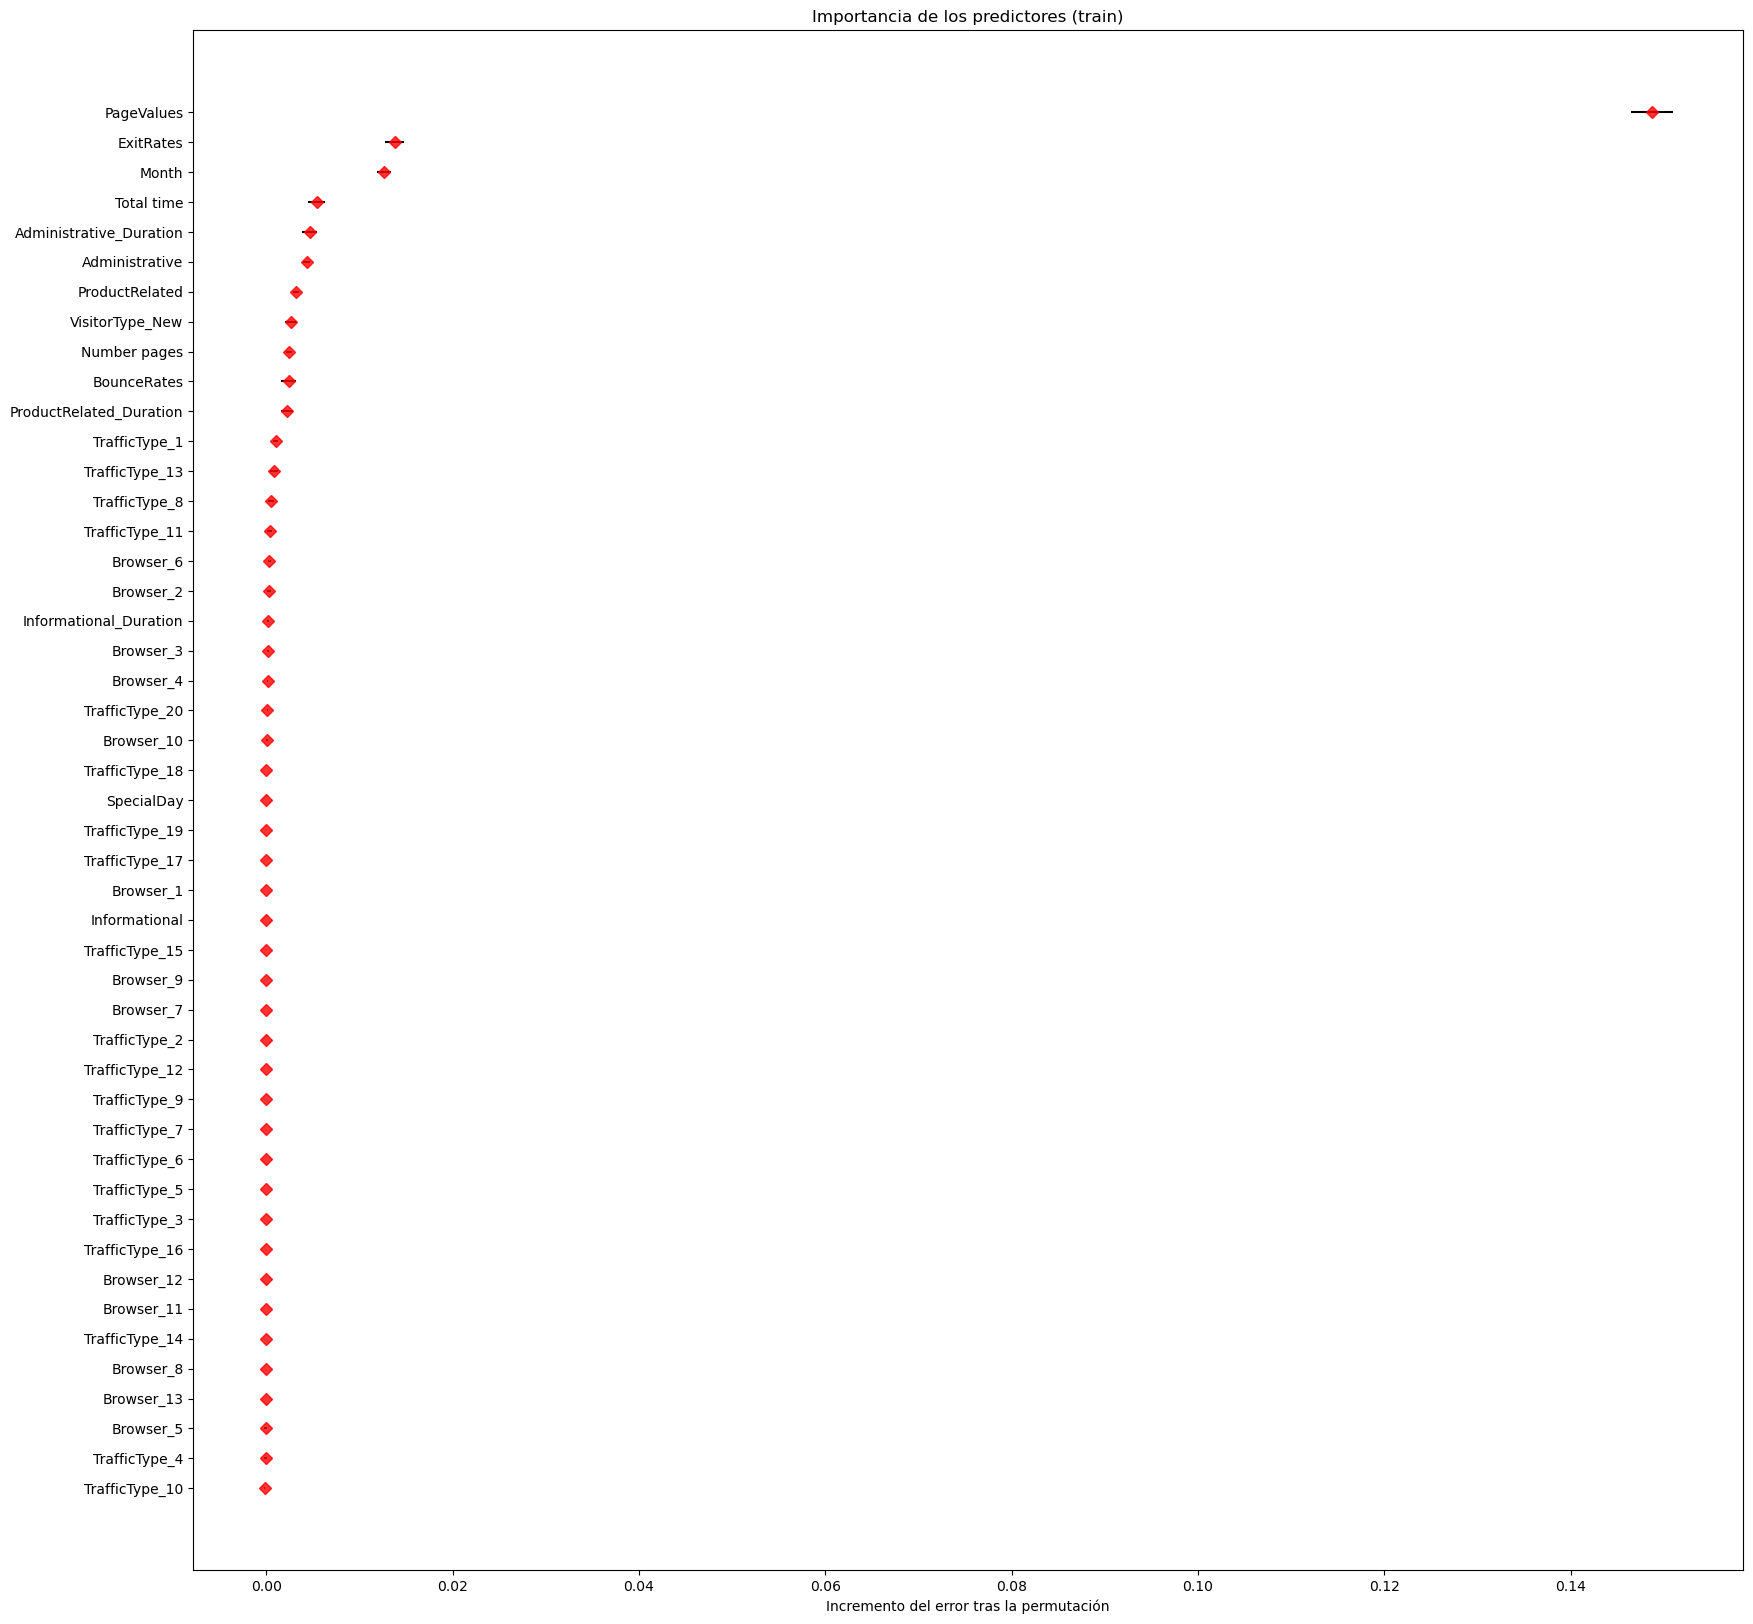

In [ ]:
# plot the importance of each variable in the permutation
fig, ax = plt.subplots(figsize=(20, 20))
sales_importancia = sales_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    sales_importancia['feature'],
    sales_importancia['importances_mean'],
    xerr=sales_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    sales_importancia['importances_mean'],
    sales_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

Due to the table and the graphics we know that the more important variables are
\begin{enumerate}
\item PageValues
\item ExitRates
\item Month
\item TotalTime
\item Administrative\_Duration
\item Administrative
\item NumberPages
\item ProductRelated
\item VisitorType\_New
\item ProductRelated\_Duration
\item BounceRates
\end{enumerate}

In [4]:
# Your API definition
app = Flask(__name__)
@app.route('/predict', methods=['POST'])
def predict():
    return('Best model to predict Revenue')
    if ran_load:
        try:
            json_ = request.json
            print(json_)
            query = pd.get_dummies(pd.DataFrame(json_))
            query = query.reindex(columns=model_columns, fill_value=0)

            prediction = list(ran_load.predict(query))

            return jsonify({'prediction': str(prediction)})

        except:

            return jsonify({'trace': traceback.format_exc()})
    else:
        print ('Train the model first')
        return ('No model here to use')

if __name__ == '__main__':
    try:
        port = int(sys.argv[1]) # This is for a command-line input
    except:
        port = 12345 # If you don't provide any port the port will be set to 12345

    ran_load = joblib.load('my_model_ran.pkl.pkl') # Load "model.pkl"
    print ('Model loaded')
    model_columns = joblib.load("model_columns.pkl") # Load "model_columns.pkl"
    print ('Model columns loaded')

    app.run(port=port, debug=True)

Model loaded
Model columns loaded
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\pablo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
%tb

SystemExit: 1

\section {Suggestions}

To end the report i will give some advices:
\begin{enumerate}
\item During the months in which less people buy it could be good idea add and promote new products 
\item Increase the page value offering a better experience in a the pages.For example it should be easy 
to see feature of products and it should have a interative and well choosen colours.
\item Increasing the marketing efforts in social media could be useful to get new visitors.
\end{enumerate}